# Visualize module topology

In [89]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from config import PIPELINE_RUN_DIR, AMIMS, NETWORKS, SEED_SETS
from functions import split_module_id, load_module_topology, load_seed_stats, load_network_topology

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
amim_meta_df = pd.DataFrame.from_dict(AMIMS)
network_meta_df = pd.DataFrame.from_dict(NETWORKS)
seed_meta_df = pd.DataFrame.from_dict(SEED_SETS)

df = load_module_topology()

module_df = df.copy()
seeds_df = load_seed_stats()
networks_df = load_network_topology()

id_vars = ["seed_id", "network_id", "network", "amim", "amim_id"]
module_df  = module_df .rename(columns=lambda c: f"{c}_module" if c not in id_vars else c)
seeds_df  = seeds_df .rename(columns=lambda c: f"{c}_seeds" if c not in id_vars else c)
networks_df  = networks_df .rename(columns=lambda c: f"{c}_network" if c not in id_vars else c)


df_merged = module_df.merge(seeds_df, on=["seed_id", "network_id", "network"]).merge(networks_df, on=["network"])

df_merged["dropped_seeds"] = df_merged.Seeds_seeds - df_merged.seeds_module
df_merged["included_seeds_percent"] = df_merged.seeds_module / df_merged.Seeds_seeds * 100

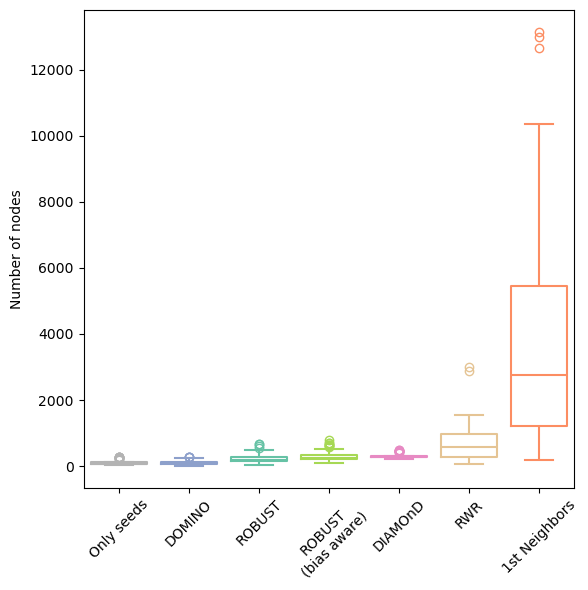

In [28]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="nodes", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)

plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Number of nodes")
plt.tight_layout()
plt.show()

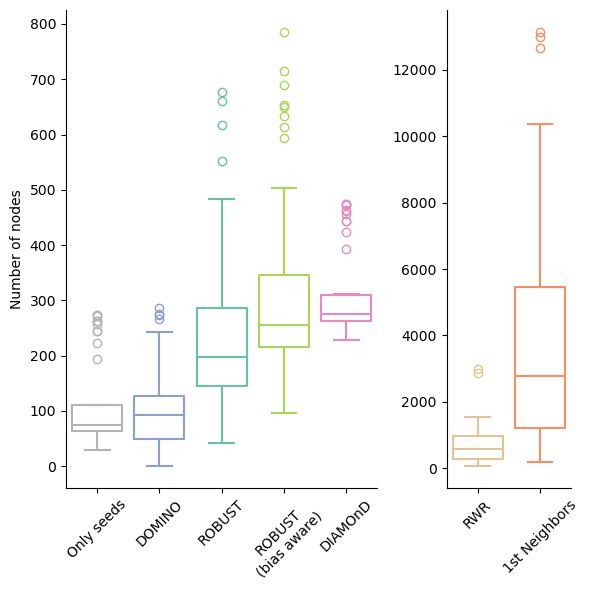

In [82]:
# add groups to separate by size
big_amims = ["rwr","firstneighbor"]
df["amim_group"] = df["amim_id"].apply(lambda x: "big" if x in big_amims else "small")

groups = ["small", "big"]
grouped = {g: df[df["amim_group"] == g] for g in groups}

# compute number of categories per group for sizing
n_categories = {g: grouped[g]["amim"].nunique() for g in groups}
total = sum(n_categories.values())

# creat one subplot for each group
fig, axes = plt.subplots(
    1, len(groups),
    figsize=(6, 6),
    gridspec_kw={"width_ratios": [n_categories[g] for g in groups]}
)

# plot each group separately
for ax, group in zip(axes, groups):
    sns.boxplot(
        data=grouped[group],
        x="amim",
        y="nodes",
        ax=ax,
        hue="amim",
        palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
        order=[a for a in amim_meta_df.label if a in grouped[group]["amim"].unique()],
        hue_order=[a for a in amim_meta_df.label if a in grouped[group]["amim"].unique()],
        fill=False
    )
    ax.set_xlabel("")
    for label in ax.get_xticklabels():
        label.set_rotation(45)

    # remove spines
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)

axes[0].set_ylabel("Number of nodes")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

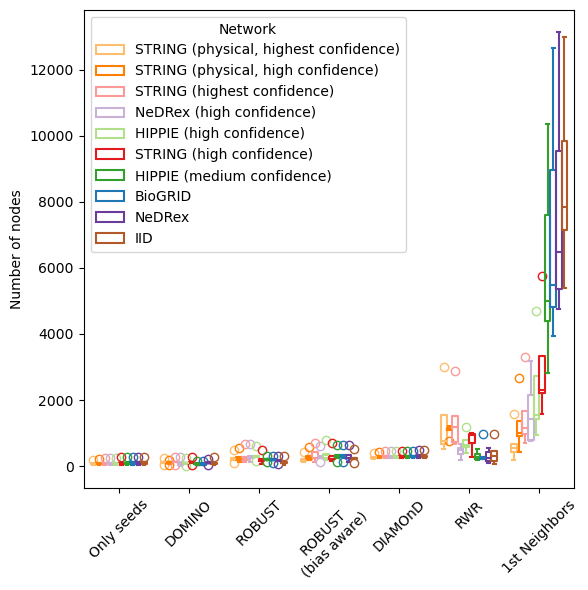

In [5]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="nodes", hue="network", x="amim", fill=False, palette=dict(zip(network_meta_df.label, network_meta_df.color)), hue_order=network_meta_df.label, order=amim_meta_df.label)

plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Number of nodes")
plt.legend(title="Network")
plt.tight_layout()
plt.show()

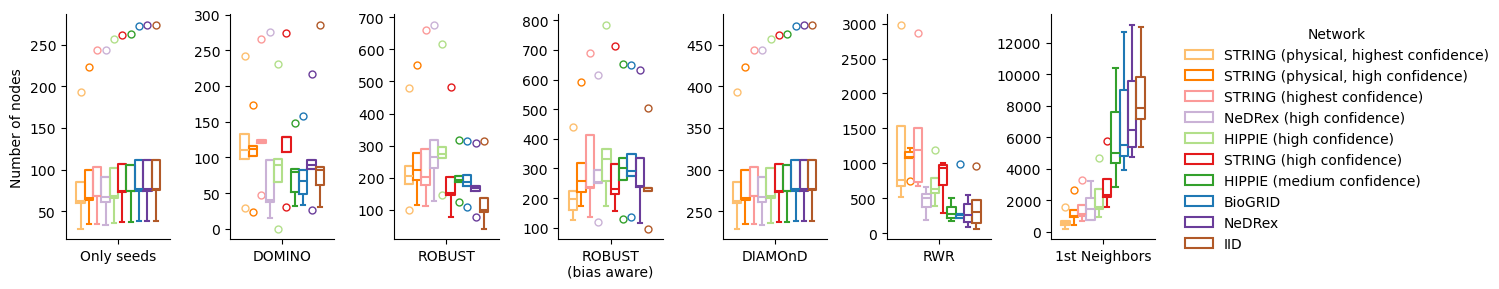

In [67]:
g = sns.catplot(
    data=df,
    kind="box",
    x="amim",
    y="nodes",
    col="amim",
    col_order=amim_meta_df.label,
    hue="network",
    palette=dict(zip(network_meta_df.label, network_meta_df.color)),
    hue_order=network_meta_df.label,
    height=3,
    aspect=0.5,
    sharex=False,
    sharey=False,
    fill=False,
)

g.set_axis_labels("", "Number of nodes")
g.set_titles("")  # removes facet titles

plt.tight_layout()
g.figure.subplots_adjust(right=0.85)  # make space for legend
g._legend.set_title("Network")
g._legend.set_bbox_to_anchor((1.1, 0.5))  # move legend outside

plt.show()

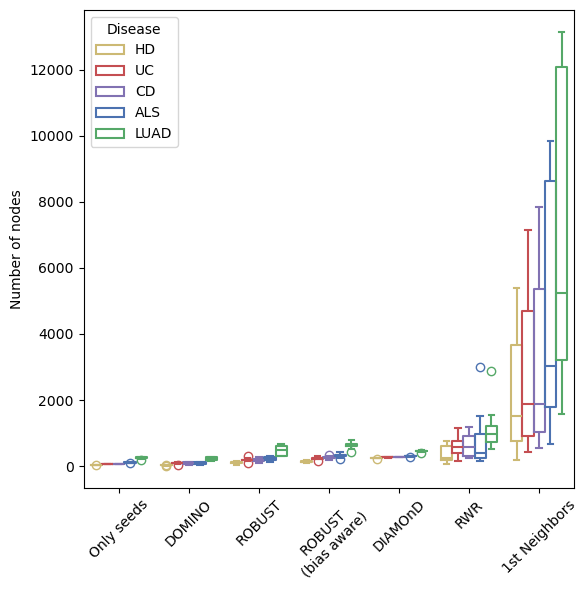

In [6]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="nodes", hue="seed_id", x="amim", fill=False, palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), hue_order=seed_meta_df.short, order=amim_meta_df.label)
plt.xticks(rotation=45)
plt.xlabel("")
plt.ylabel("Number of nodes")
plt.legend(title="Disease")
plt.tight_layout()
plt.show()

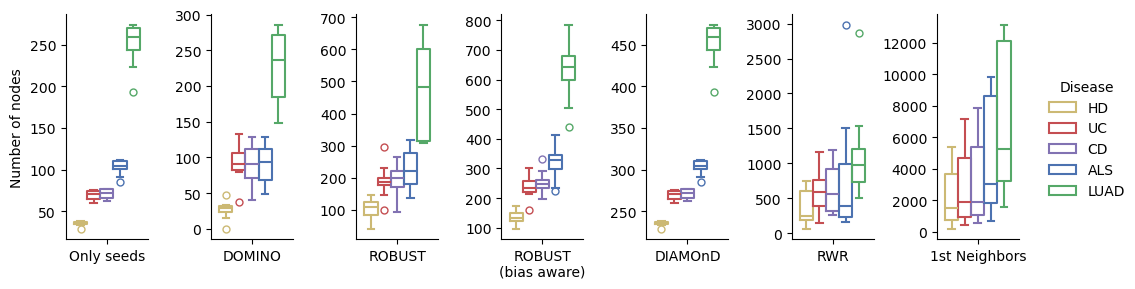

In [86]:
g = sns.catplot(
    data=df,
    kind="box",
    x="amim",
    y="nodes",
    col="amim",
    col_order=amim_meta_df.label,
    hue="seed_id",
    palette=dict(zip(seed_meta_df.short, seed_meta_df.color)),
    hue_order=seed_meta_df.short,
    height=3,
    aspect=0.5,
    sharex=False,
    sharey=False,
    fill=False,
)

g.set_axis_labels("", "Number of nodes")
g.set_titles("")  # removes facet titles

plt.tight_layout()
g.figure.subplots_adjust(right=0.9)  # make space for legend
g._legend.set_title("Disease")
g._legend.set_bbox_to_anchor((1., 0.5))  # move legend outside

plt.show()

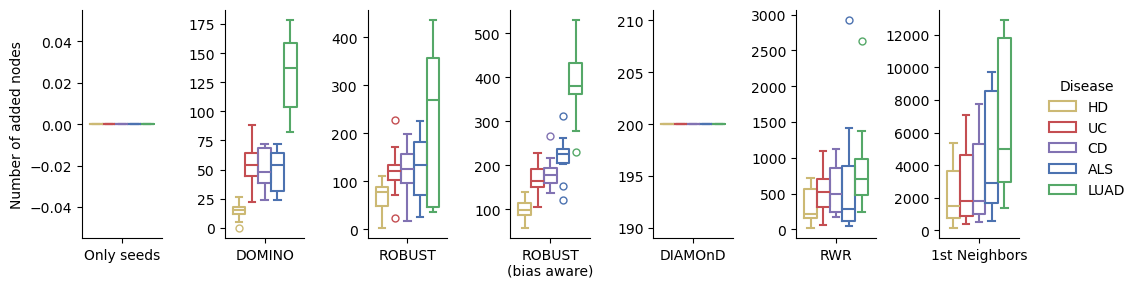

In [87]:
g = sns.catplot(
    data=df,
    kind="box",
    x="amim",
    y="added_nodes",
    col="amim",
    col_order=amim_meta_df.label,
    hue="seed_id",
    palette=dict(zip(seed_meta_df.short, seed_meta_df.color)),
    hue_order=seed_meta_df.short,
    height=3,
    aspect=0.5,
    sharex=False,
    sharey=False,
    fill=False,
)

g.set_axis_labels("", "Number of added nodes")
g.set_titles("")  # removes facet titles

plt.tight_layout()
g.figure.subplots_adjust(right=0.9)  # make space for legend
g._legend.set_title("Disease")
g._legend.set_bbox_to_anchor((1., 0.5))  # move legend outside

plt.show()

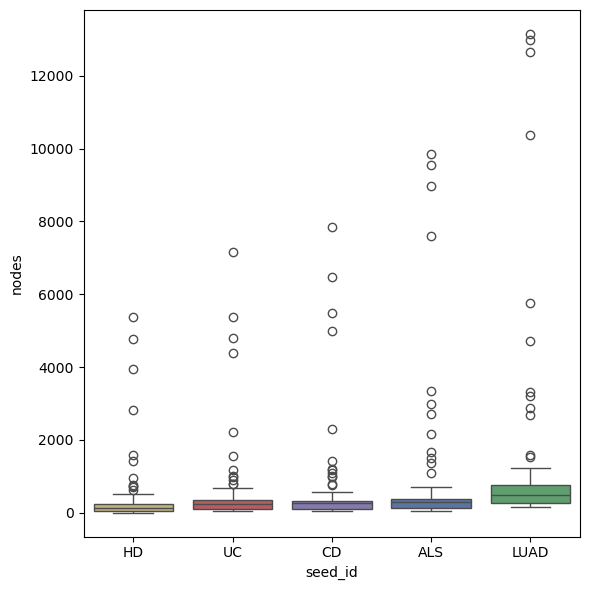

In [85]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="nodes", hue="seed_id", x="seed_id", palette=dict(zip(seed_meta_df.short, seed_meta_df.color)), order=seed_meta_df.short)
plt.tight_layout()
plt.show()

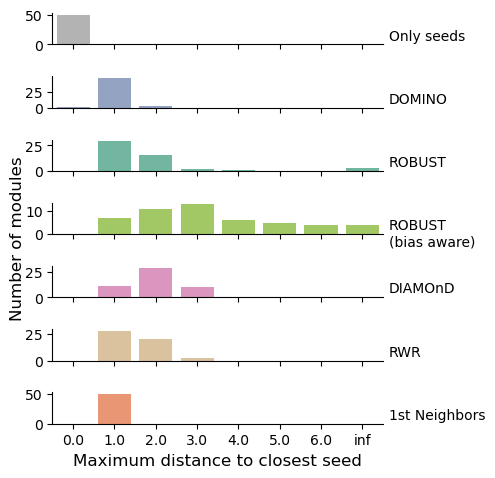

In [88]:

# Faceted countplot
g = sns.catplot(
    data=df,
    x="max_dist_to_seed",
    col=None,
    row_order=amim_meta_df.label,
    row="amim",
    kind="count",
    hue="amim",
    hue_order=amim_meta_df.label,
    palette=dict(zip(amim_meta_df.label, amim_meta_df.color)),
    height=0.7,                      # Adjust height per facet
    aspect=7,                        # Adjust aspect ratio
    sharey=False,                  # Do not share y-axis
    legend=False,                  # Disable legend
)

g.set_titles(col_template="", row_template="")
g.set_xlabels("Maximum distance to closest seed", fontsize=12)
for ax, row_val in zip(g.axes.flat, amim_meta_df.label):
    ax.set_ylabel(f"{row_val}", rotation=0, ha="left", va="center")
    ax.yaxis.set_label_position("right")
g.figure.text(0, 0.5, "Number of modules", va='center', rotation='vertical', fontsize=12)

plt.tight_layout()
plt.show()

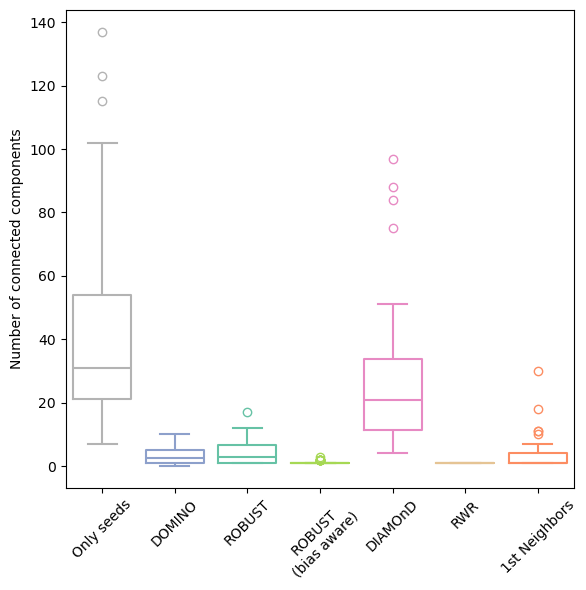

In [79]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y="components", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xlabel("")
plt.ylabel("Number of connected components")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

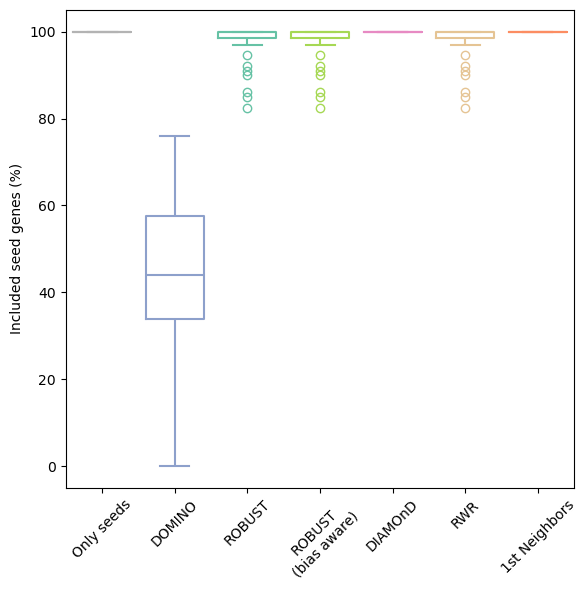

In [105]:

plt.figure(figsize=(6, 6))
sns.boxplot(data=df_merged, y="included_seeds_percent", hue="amim", x="amim", fill=False, palette=dict(zip(amim_meta_df.label, amim_meta_df.color)), order=amim_meta_df.label)
plt.xlabel("")
plt.ylabel("Included seed genes (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()